In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, classification_report, recall_score

import joblib
import warnings

df = pd.read_csv('sentiAnalysis.csv')  # Replace with the actual path to your training set

In [40]:
def remove_outliers(df, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    # Calculate IQR (Interquartile Range)
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out the outliers
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df
df = remove_outliers(df, 'Duration_hours')

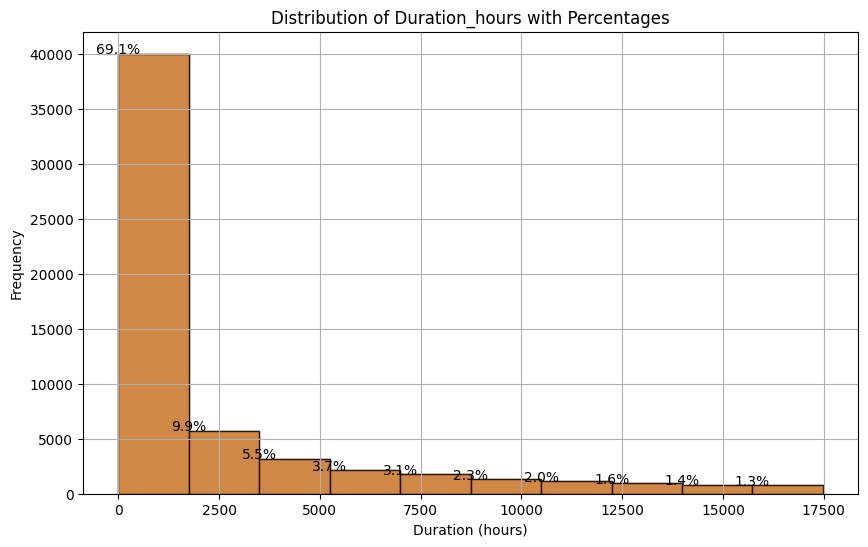

In [46]:
import matplotlib.pyplot as plt

# Plotting the distribution
plt.figure(figsize=(10, 6))

# Calculate frequencies and bins
counts, bins, _ = plt.hist(df['Duration_hours'], bins=10, edgecolor='black', alpha=0.7)

# Calculate percentages for each bin
percentages = [(count / len(df)) * 100 for count in counts]

# Plot histogram
plt.hist(df['Duration_hours'], bins=10, edgecolor='black', alpha=0.7)

# Add percentages as annotations
for i, count in enumerate(counts):
    plt.text(bins[i] + 0.15, count + 0.5, f'{percentages[i]:.1f}%', fontsize=10, ha='center')

plt.xlabel('Duration (hours)')
plt.ylabel('Frequency')
plt.title('Distribution of Duration_hours with Percentages')
plt.grid(True)
plt.show()


In [51]:
threshold = df['Duration_hours'].quantile(0.5)

# Create a new column TimeLabel based on the threshold
df['TimeLabel'] = df['Duration_hours'].apply(lambda x: 'short' if x <= threshold else 'long')


In [48]:
def MLPmodel(df, input_columns, target_column, test_size=0.20, max_features=1000, hidden_layer_sizes=(64, 32), activation='relu', max_iter=100, random_state=42):
    #Train and test a MLP model
    # Fill NaN values with a space
    df[input_columns] = df[input_columns].fillna('')

    # Combine input columns into a single text feature
    X = df[input_columns].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
    y = df[target_column]

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Vectorize the text data
    vectorizer = TfidfVectorizer(max_features=max_features)
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)

    # Initialize and train the MLPClassifier
    model = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, activation=activation, max_iter=max_iter, random_state=random_state)
    model.fit(X_train_vec, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test_vec)

    # Calculate metrics using y_test and y_pred
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    report = classification_report(y_test, y_pred)

    print(f"Accuracy: {accuracy:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(report)

    return model

In [52]:
MLPmodel(df, ['Emotion'], 'TimeLabel')
MLPmodel(df, ['Emotion', 'Priority'], 'TimeLabel')
MLPmodel(df, ['Emotion', 'Priority', 'Emotionality'], 'TimeLabel')
MLPmodel(df, ['Priority'], 'TimeLabel')
MLPmodel(df, ['Emotionality'], 'TimeLabel')
MLPmodel(df, ['Emotionality', 'Priority'], 'TimeLabel')

Accuracy: 0.51
F1 Score: 0.51
Precision: 0.51
Recall: 0.51
              precision    recall  f1-score   support

        long       0.51      0.47      0.49      5809
       short       0.51      0.55      0.53      5761

    accuracy                           0.51     11570
   macro avg       0.51      0.51      0.51     11570
weighted avg       0.51      0.51      0.51     11570

Accuracy: 0.54
F1 Score: 0.45
Precision: 0.61
Recall: 0.54
              precision    recall  f1-score   support

        long       0.69      0.15      0.24      5809
       short       0.52      0.93      0.67      5761

    accuracy                           0.54     11570
   macro avg       0.61      0.54      0.46     11570
weighted avg       0.61      0.54      0.45     11570



/home/spope/anaconda3/envs/reu/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.53
F1 Score: 0.52
Precision: 0.53
Recall: 0.53
              precision    recall  f1-score   support

        long       0.55      0.38      0.45      5809
       short       0.52      0.68      0.59      5761

    accuracy                           0.53     11570
   macro avg       0.53      0.53      0.52     11570
weighted avg       0.53      0.53      0.52     11570

Accuracy: 0.54
F1 Score: 0.45
Precision: 0.61
Recall: 0.54
              precision    recall  f1-score   support

        long       0.69      0.15      0.24      5809
       short       0.52      0.93      0.67      5761

    accuracy                           0.54     11570
   macro avg       0.61      0.54      0.46     11570
weighted avg       0.61      0.54      0.45     11570

Accuracy: 0.51
F1 Score: 0.51
Precision: 0.51
Recall: 0.51
              precision    recall  f1-score   support

        long       0.51      0.48      0.49      5809
       short       0.50      0.54      0.52      5761

    a

MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=100, random_state=42)